#### Q3. 
We next implement layer normalization, write a function layer_norm(data) which re-
turns normalized data by computing the mean d_mean and standard deviation, d_sigma
of the data and finding result[i] = (data[i] - d_mean)/d_sigma. (2 marks)

In [78]:
import numpy as np
import matplotlib.pyplot as plt


# I am just adding this because I feel this I can do, Than working on 1st and 2nd one 
def layer_norm(data):
    d_mean = np.mean(rohit)
    d_sigma = np.std(rohit, ddof=1)
    return d_mean, d_sigma
    
rohit = np.loadtxt("data/rohit.txt")
d_mean, d_sigma = layer_norm(scores)

print("mean: ", d_mean)
print("median: ", d_sigma)

def find_result(data_i, d_mean, d_sigma):
    data_cal = (data_i - d_mean) /d_sigma
    return data_cal

# We can iterate as well over the array
print("Result[i]: ", find_result(rohit[:3], d_mean, d_sigma))


mean:  42.14339622641509
median:  44.94089346117434
Result[i]:  [-0.75974004 -0.91550018  0.21932372]



#### Q4.
Consider the 5 batsmen, Rohit, Gambhir, Kohli, Sachin, and Sehwag. Given their batting
score data (which you already have), create a box plot with their scores in one figure (all
the box plots should show up together) appropriately labeled and pick the best of these.
(2 mark)



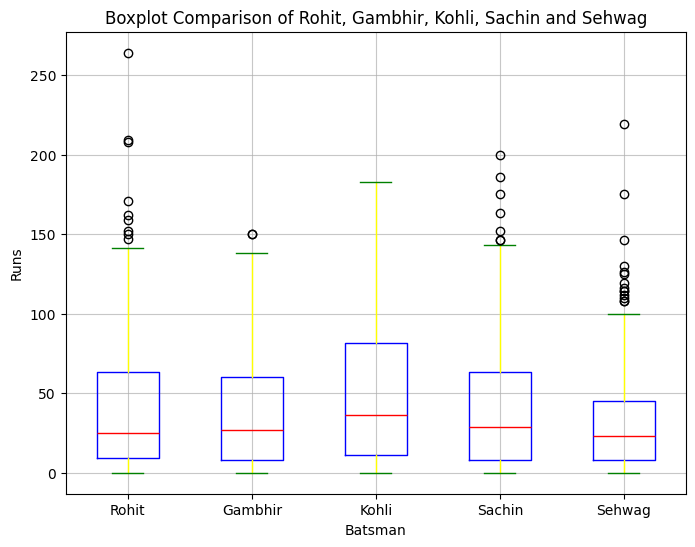

In [80]:


# Srcore files lies in data folder in my case

rohit = np.loadtxt("data/rohit.txt")
gambhir = np.loadtxt("data/gambhir.txt")
kohli = np.loadtxt("data/kohli.txt")
sachin = np.loadtxt("data/sachin.txt")
sehwag = np.loadtxt("data/sehwag.txt")


plt.figure(figsize=(8,6))
scores_array = [rohit, gambhir, kohli, sachin, sehwag]

plt.boxplot(scores_array, labels=['Rohit', 'Gambhir', 'Kohli', "Sachin", "Sehwag"],
            boxprops=dict(color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='yellow'),
            capprops=dict(color='green'))

plt.title('Boxplot Comparison of Rohit, Gambhir, Kohli, Sachin and Sehwag')
plt.ylabel('Runs')
plt.xlabel('Batsman')
plt.grid(True, alpha=0.7)
plt.show()


# The best of these two is Kohli & Sachin



#### Q5.
For the above batsmen, compute the standard deviation of their respective scores along
with their means. Use plt.errorbar to plot this information with the mean + the
standard deviation to provide a visual representation of this information. Label the axes
and ticks appropriately (hint: use plt.xticks). Comment on the result. (2 marks)

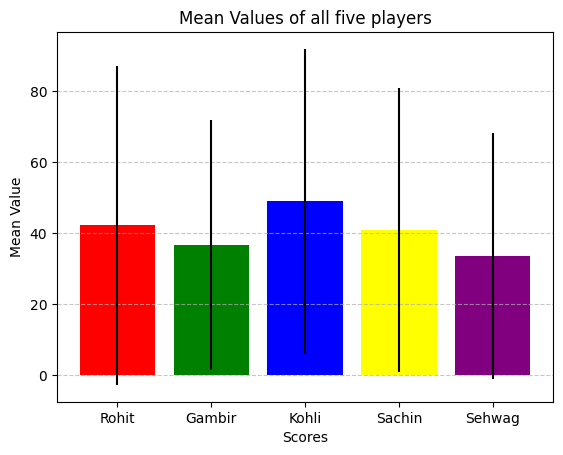

In [85]:
## Q5 Solution

rohit_mean = np.mean(rohit)
gambhir_mean = np.mean(gambhir)
kohli_mean = np.mean(kohli)
sachin_mean = np.mean(sachin)
sehwag_mean = np.mean(sehwag)


batsman_means_array =[rohit_mean, gambhir_mean, kohli_mean, sachin_mean, sehwag_mean]
std_dev_array = [np.std(rohit, ddof=1), np.std(gambhir, ddof=1), np.std(kohli, ddof=1),
                 np.std(sachin, ddof=1), np.std(sehwag, ddof=1)]


plt.bar(['Rohit', 'Gambir', 'Kohli', 'Sachin', 'Sehwag'], batsman_means_array, yerr=std_dev_array, color=['red','green','blue','yellow', 'purple'])
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.title('Mean Values of all five players')
plt.ylabel('Mean Value')
plt.xlabel('Scores')
plt.xticks([0,1,2,3,4], ['Rohit', 'Gambir', 'Kohli', 'Sachin', 'Sehwag'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Observation
# Mean of Kohli is higher than other players
# Second highest mean of Rohit 
# Looks overall Gambhir performance is better than Sehwag

#### Q6.
For the above 5 batsmen, compute their probability mass function as done in class using
their scores data. Then use this to find the probability that they will score more than
50 if they have crossed 5 runs. Print this information for each batsman. Ideally do this
in a loop rather than 5 cut-pasted code-blocks. (5 marks)

In [84]:
## Q6 Solution

def compute_pmf(data):
    unique, counts = np.unique(data, return_counts=True)
    pmf = counts / len(data)
    return unique, pmf

def probability_in_range(unique, pmf, a, b):
    mask = (unique >= a) & (unique <= b)
    return pmf[mask].sum()

players_collection = {
    "Rohit": rohit,
    "Gambhir": gambhir,
    "Kohli": kohli,
    "Sachin": sachin,
    "Sehwag": sehwag
}
for player, scores in players_collection.items():
    unique_scores, pmf_values = compute_pmf(scores)
    prob_more_50 = probability_in_range(unique_scores, pmf_values, 51, scores.max())
    prob_more_5 = probability_in_range(unique_scores, pmf_values, 6, scores.max())
    conditional_prob_value = prob_more_50 / prob_more_5 if prob_more_5 > 0 else np.nan
    print(player + ": Scoring probability > 50 if scored >5: ", conditional_prob_value)


    

Rohit: Scoring probability > 50 if scored >5:  0.430622009569378
Gambhir: Scoring probability > 50 if scored >5:  0.3793103448275862
Kohli: Scoring probability > 50 if scored >5:  0.5186721991701244
Sachin: Scoring probability > 50 if scored >5:  0.3972222222222222
Sehwag: Scoring probability > 50 if scored >5:  0.27179487179487183
